In [1]:
import numpy as np
import pandas as pd
from scipy.stats import uniform, norm
import matplotlib.pyplot as plt
from sklearn.utils import resample

np.random.seed(123)
theta_true = 10  # Милославов
n = 20
alpha = 0.05
B = 1000


1. Генерация выборки из U[0, 10] размера n=20
Выборка: [6.96469186 2.86139335 2.26851454 5.51314769 7.1946897  4.2310646
 9.80764198 6.84829739 4.80931901 3.92117518 3.43178016 7.29049707
 4.38572245 0.59677897 3.98044255 7.37995406 1.8249173  1.75451756
 5.31551374 5.31827587]

2. Вычисленные статистики:
Y = (1/n)∑X_i² = 28.0635
Z = (1/n)∑X_i³ = 185.7180
Оценка метода моментов θ̂ = 4Z/(3Y) = 8.8237
ОМП θ̂ = X_(20) = 9.8076

3. Построение доверительных интервалов (α=0.05)

а) Асимптотический ДИ на основе 4Z/(3Y):
   Асимпт. дисперсия = 0.333677
   ДИ = [7.6915, 9.9559]
   Длина = 2.2643

б) Точный ДИ на основе ОМП:
   ДИ = [9.8076, 11.3924]
   Длина = 1.5848

в) Непараметрический бутстрэп-интервал Холла:
   ДИ = [7.4556, 10.5217]
   Длина = 3.0661

г) Параметрический бутстрэп-интервал:
   ДИ = [7.8412, 10.2555]
   Длина = 2.4143

СРАВНЕНИЕ ДОВЕРИТЕЛЬНЫХ ИНТЕРВАЛОВ
                   Метод Нижняя граница Верхняя граница  Длина Накрывает θ
 Асимптотический (4Z/3Y)         7.6915        

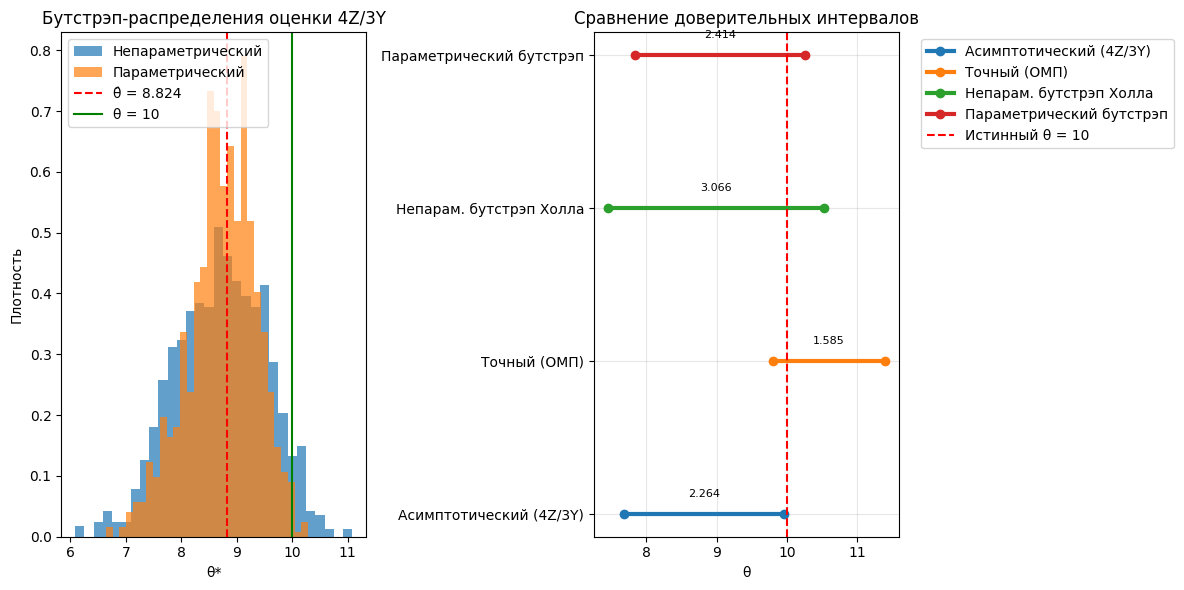


9. АНАЛИЗ РЕЗУЛЬТАТОВ:
   - Самый узкий интервал: Точный (ОМП)
   - Число интервалов, накрывающих θ: 3/4

10. Проверка нормальности бутстрэп-распределений:
   - Непараметрический: p-value = 0.0070 (не нормальное)
   - Параметрический: p-value = 0.0000 (не нормальное)


In [2]:
print(f"\n1. Генерация выборки из U[0, {theta_true}] размера n={n}")
X_orig = uniform.rvs(0, theta_true, size=n)
print(f"Выборка: {X_orig}")

Y = np.mean(X_orig**2)
Z = np.mean(X_orig**3)
theta_hat_mm = (4 * Z) / (3 * Y)  
theta_hat_mle = np.max(X_orig)    

print(f"\n2. Вычисленные статистики:")
print(f"Y = (1/n)∑X_i² = {Y:.4f}")
print(f"Z = (1/n)∑X_i³ = {Z:.4f}")
print(f"Оценка метода моментов θ̂ = 4Z/(3Y) = {theta_hat_mm:.4f}")
print(f"ОМП θ̂ = X_({n}) = {theta_hat_mle:.4f}")

print(f"\n3. Построение доверительных интервалов (α={alpha})")

asymp_var = (3 * theta_hat_mm**2) / (35 * n)
z_quantile = norm.ppf(1 - alpha/2)

ci_asymp = [
    theta_hat_mm - z_quantile * np.sqrt(asymp_var),
    theta_hat_mm + z_quantile * np.sqrt(asymp_var)
]

print(f"\nа) Асимптотический ДИ на основе 4Z/(3Y):")
print(f"   Асимпт. дисперсия = {asymp_var:.6f}")
print(f"   ДИ = [{ci_asymp[0]:.4f}, {ci_asymp[1]:.4f}]")
print(f"   Длина = {ci_asymp[1] - ci_asymp[0]:.4f}")

print(f"\nб) Точный ДИ на основе ОМП:")
ci_exact_mle = [
    theta_hat_mle,
    theta_hat_mle / (alpha**(1/n))
]
print(f"   ДИ = [{ci_exact_mle[0]:.4f}, {ci_exact_mle[1]:.4f}]")
print(f"   Длина = {ci_exact_mle[1] - ci_exact_mle[0]:.4f}")

print(f"\nв) Непараметрический бутстрэп-интервал Холла:")

theta_star_np = []
for _ in range(B):
    X_star = resample(X_orig, replace=True, n_samples=n)
    Y_star = np.mean(X_star**2)
    Z_star = np.mean(X_star**3)
    theta_star = (4 * Z_star) / (3 * Y_star)
    theta_star_np.append(theta_star)

q_low_np = np.quantile(theta_star_np, alpha/2)
q_high_np = np.quantile(theta_star_np, 1 - alpha/2)

ci_bootstrap_hall = [
    2 * theta_hat_mm - q_high_np,
    2 * theta_hat_mm - q_low_np
]

print(f"   ДИ = [{ci_bootstrap_hall[0]:.4f}, {ci_bootstrap_hall[1]:.4f}]")
print(f"   Длина = {ci_bootstrap_hall[1] - ci_bootstrap_hall[0]:.4f}")

print(f"\nг) Параметрический бутстрэп-интервал:")

theta_star_param = []
for _ in range(B):
    X_star = uniform.rvs(0, theta_hat_mm, size=n)
    Y_star = np.mean(X_star**2)
    Z_star = np.mean(X_star**3)
    theta_star = (4 * Z_star) / (3 * Y_star)
    theta_star_param.append(theta_star)

q_low_param = np.quantile(theta_star_param, alpha/2)
q_high_param = np.quantile(theta_star_param, 1 - alpha/2)

ci_bootstrap_param = [
    theta_hat_mm - (q_high_param - theta_hat_mm),
    theta_hat_mm - (q_low_param - theta_hat_mm)
]

print(f"   ДИ = [{ci_bootstrap_param[0]:.4f}, {ci_bootstrap_param[1]:.4f}]")
print(f"   Длина = {ci_bootstrap_param[1] - ci_bootstrap_param[0]:.4f}")

print(f"\n" + "="*50)
print("СРАВНЕНИЕ ДОВЕРИТЕЛЬНЫХ ИНТЕРВАЛОВ")
print("="*50)

intervals = {
    "Асимптотический (4Z/3Y)": ci_asymp,
    "Точный (ОМП)": ci_exact_mle,
    "Непарам. бутстрэп Холла": ci_bootstrap_hall,
    "Параметрический бутстрэп": ci_bootstrap_param
}

comparison_data = []
for name, interval in intervals.items():
    length = interval[1] - interval[0]
    covers = interval[0] <= theta_true <= interval[1]
    comparison_data.append({
        'Метод': name,
        'Нижняя граница': f"{interval[0]:.4f}",
        'Верхняя граница': f"{interval[1]:.4f}", 
        'Длина': f"{length:.4f}",
        'Накрывает θ': 'Да' if covers else 'Нет'
    })

df_comparison = pd.DataFrame(comparison_data)
print(df_comparison.to_string(index=False))

print(f"\n8. Визуализация доверительных интервалов:")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(theta_star_np, bins=30, alpha=0.7, label='Непараметрический', density=True)
plt.hist(theta_star_param, bins=30, alpha=0.7, label='Параметрический', density=True)
plt.axvline(theta_hat_mm, color='red', linestyle='--', label=f'θ̂ = {theta_hat_mm:.3f}')
plt.axvline(theta_true, color='green', linestyle='-', label=f'θ = {theta_true}')
plt.xlabel('θ*')
plt.ylabel('Плотность')
plt.title('Бутстрэп-распределения оценки 4Z/3Y')
plt.legend()

plt.subplot(1, 2, 2)
methods = list(intervals.keys())
y_pos = np.arange(len(methods))

for i, (method, interval) in enumerate(intervals.items()):
    plt.plot(interval, [i, i], 'o-', linewidth=3, label=method)
    plt.text(np.mean(interval), i + 0.1, f'{interval[1]-interval[0]:.3f}', 
             ha='center', va='bottom', fontsize=8)

plt.axvline(theta_true, color='red', linestyle='--', label=f'Истинный θ = {theta_true}')
plt.yticks(y_pos, methods)
plt.xlabel('θ')
plt.title('Сравнение доверительных интервалов')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n9. АНАЛИЗ РЕЗУЛЬТАТОВ:")
print(f"   - Самый узкий интервал: {min(intervals.items(), key=lambda x: x[1][1]-x[1][0])[0]}")
print(f"   - Число интервалов, накрывающих θ: {sum(1 for interval in intervals.values() if interval[0] <= theta_true <= interval[1])}/4")

from scipy.stats import shapiro

print(f"\n10. Проверка нормальности бутстрэп-распределений:")
_, p_np = shapiro(theta_star_np)
_, p_param = shapiro(theta_star_param)
print(f"   - Непараметрический: p-value = {p_np:.4f} {'(нормальное)' if p_np > 0.05 else '(не нормальное)'}")
print(f"   - Параметрический: p-value = {p_param:.4f} {'(нормальное)' if p_param > 0.05 else '(не нормальное)'}")